In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn


In [7]:
pip install --upgrade xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 96 kB 3.2 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [3]:
df=pd.read_excel('/content/CTG.xls',header=0,skipfooter=3,sheet_name=2)


In [4]:
df.head()

,FileName,Date,SegFile,b,e,LBE,LB,AC,FM,UC,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Variab10.txt,1996-12-01,CTG0001.txt,240.0,357.0,120.0,120.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,2.0
2,Fmcs_1.txt,1996-05-03,CTG0002.txt,5.0,632.0,132.0,132.0,4.0,0.0,4.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
3,Fmcs_1.txt,1996-05-03,CTG0003.txt,177.0,779.0,133.0,133.0,2.0,0.0,5.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
4,Fmcs_1.txt,1996-05-03,CTG0004.txt,411.0,1192.0,134.0,134.0,2.0,0.0,6.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0


In [5]:
df=df.dropna(axis=0, how='all')
df=df.dropna(axis=1, how='all')

In [6]:
df.shape

(2126, 40)

In [7]:
df.columns

Index(['FileName', 'Date', 'SegFile', 'b', 'e', 'LBE', 'LB', 'AC', 'FM', 'UC',
       'ASTV', 'MSTV', 'ALTV', 'MLTV', 'DL', 'DS', 'DP', 'DR', 'Width', 'Min',
       'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean', 'Median', 'Variance',
       'Tendency', 'A', 'B', 'C', 'D', 'E', 'AD', 'DE', 'LD', 'FS', 'SUSP',
       'CLASS', 'NSP'],
      dtype='object')

In [8]:
import tensorflow as tf
print(tf.__version__)

2.8.2


In [9]:
#drop irrelevant columns
df.drop(columns=['FileName', 'Date', 'SegFile','b','e','LBE', 'A', 'B', 'C', 'D', 'E', 'AD', 'DE', 'LD', 'FS', 'SUSP', 'DR','CLASS'], inplace=True)

In [10]:
df.shape

(2126, 22)

In [11]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
LB,2126.0,133.303857,9.840844,106.0,126.0,133.0,140.0,160.0
AC,2126.0,2.722484,3.560850,0.0,0.0,1.0,4.0,26.0
FM,2126.0,7.241298,37.125309,0.0,0.0,0.0,2.0,564.0
UC,2126.0,3.659925,2.847094,0.0,1.0,3.0,5.0,23.0
ASTV,2126.0,46.990122,17.192814,12.0,32.0,49.0,61.0,87.0
MSTV,2126.0,1.332785,0.883241,0.2,0.7,1.2,1.7,7.0
ALTV,2126.0,9.846660,18.396880,0.0,0.0,0.0,11.0,91.0
MLTV,2126.0,8.187629,5.628247,0.0,4.6,7.4,10.8,50.7
DL,2126.0,1.570085,2.499229,0.0,0.0,0.0,3.0,16.0
DS,2126.0,0.003293,0.057300,0.0,0.0,0.0,0.0,1.0


In [12]:
#Convert to binary classification- normal & suspecious/pathalogi
df['NSP']=df['NSP'].apply(lambda x:0 if x==1 else 1)

In [13]:
df['NSP'].value_counts()

0    1655
1     471
Name: NSP, dtype: int64

In [14]:
#Divide the data
X=df.iloc[:,:21]
y=df.iloc[:,21]

In [15]:
X.head()

,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,...,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency
1,120.0,0.0,0.0,0.0,73.0,0.5,43.0,2.4,0.0,0.0,...,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0
2,132.0,4.0,0.0,4.0,17.0,2.1,0.0,10.4,2.0,0.0,...,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0
3,133.0,2.0,0.0,5.0,16.0,2.1,0.0,13.4,2.0,0.0,...,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0
4,134.0,2.0,0.0,6.0,16.0,2.4,0.0,23.0,2.0,0.0,...,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0
5,132.0,4.0,0.0,5.0,16.0,2.4,0.0,19.9,0.0,0.0,...,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0


In [16]:
y

1       1
2       0
3       0
4       0
5       0
       ..
2122    1
2123    1
2124    1
2125    1
2126    0
Name: NSP, Length: 2126, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [18]:
#feature engineering
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [19]:
X_train

array([[-0.03297075, -0.76037189, -0.07538122, ..., -0.43989944,
        -0.33270075,  1.09954375],
       [-0.64765343, -0.76037189, -0.1976169 , ..., -1.00175817,
        -0.64380262, -0.54307362],
       [-1.05744188,  3.4480753 , -0.13649906, ..., -0.01850538,
        -0.29813387,  1.09954375],
       ...,
       [-0.4427592 ,  0.08131755, -0.16705798, ..., -0.08873773,
        -0.4018345 , -0.54307362],
       [-0.54520631,  0.08131755, -0.1976169 , ..., -0.15897007,
         0.25493612,  1.09954375],
       [-1.9794659 , -0.76037189, -0.1976169 , ..., -1.5636169 ,
        -0.64380262, -0.54307362]])

In [20]:
X_test

array([[-0.34031209, -0.47980874, -0.1976169 , ..., -0.22920241,
        -0.60923574, -0.54307362],
       [ 0.06947637,  1.76469642, -0.16705798, ...,  0.82428272,
         0.49690424, -0.54307362],
       [-0.85254765, -0.47980874, -0.1976169 , ..., -0.43989944,
        -0.60923574, -0.54307362],
       ...,
       [-0.03297075, -0.1992456 , -0.1976169 , ...,  0.26242398,
        -0.54010199,  1.09954375],
       [-0.75010054,  0.08131755, -0.13649906, ..., -0.43989944,
        -0.29813387,  1.09954375],
       [-0.34031209,  0.92300699, 16.82370109, ..., -0.36966709,
         0.289503  , -0.54307362]])

In [21]:
X_train.shape

(1594, 21)

**ANN**

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,ReLU,PReLU
from tensorflow.keras.layers import Dropout

In [23]:
#Initialize ANN
classifier=Sequential()

In [24]:
#Input layer
classifier.add(Dense(units=21,activation='relu'))

In [25]:
#First hidden layer
classifier.add(Dense(units=15,activation='relu'))

In [26]:
#second hidden layer
classifier.add(Dense(units=10,activation='relu'))

In [27]:
#output layer
classifier.add(Dense(units=1,activation='sigmoid'))

In [28]:
import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.001)

In [29]:
#compile ANN
classifier.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [30]:
model_history = classifier.fit(X_train, y_train, validation_split=0.33,batch_size=16, epochs=1000)

Epoch 1/1000
67/67 [==============================] - 1s 6ms/step - loss: 0.5672 - accuracy: 0.7835 - val_loss: 0.5001 - val_accuracy: 0.7723
Epoch 2/1000
67/67 [==============================] - 0s 3ms/step - loss: 0.4328 - accuracy: 0.7901 - val_loss: 0.3834 - val_accuracy: 0.8235
Epoch 3/1000
67/67 [==============================] - 0s 3ms/step - loss: 0.3316 - accuracy: 0.8519 - val_loss: 0.2904 - val_accuracy: 0.8710
Epoch 4/1000
67/67 [==============================] - 0s 3ms/step - loss: 0.2614 - accuracy: 0.8922 - val_loss: 0.2308 - val_accuracy: 0.8918
Epoch 5/1000
67/67 [==============================] - 0s 3ms/step - loss: 0.2185 - accuracy: 0.9157 - val_loss: 0.2021 - val_accuracy: 0.9089
Epoch 6/1000
67/67 [==============================] - 0s 3ms/step - loss: 0.1962 - accuracy: 0.9175 - val_loss: 0.1931 - val_accuracy: 0.9203
Epoch 7/1000
67/67 [==============================] - 0s 3ms/step - loss: 0.1851 - accuracy: 0.9185 - val_loss: 0.1797 - val_accuracy: 0.9241
Epoch 

In [31]:
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


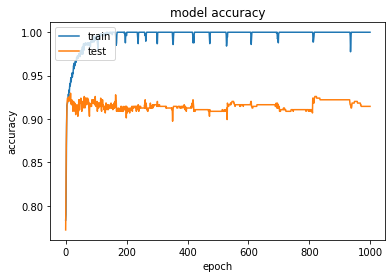

In [32]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

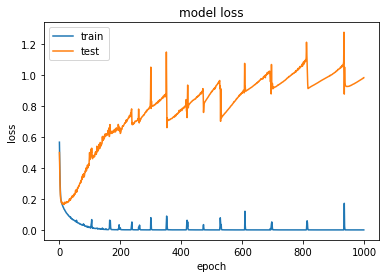

In [33]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [34]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [35]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [36]:
cm

array([[388,  22],
       [ 21, 101]])

In [37]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [38]:
score

0.9191729323308271